## Analisis Sentimen Tentang Vaksin Menggunakan Metode K-NN

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import matplotlib.pyplot as plt
#NLTK
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
!pip install sastrawi
nltk.download('stopwords')

     |████████████████████████████████| 209 kB 5.2 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Input Dataset

In [ ]:
df= pd.read_excel("vaksin.xlsx")
df

,Date,Label,Komen
0,2021-12-08 10:58:02+00:00,N,b'Banyak yg yakin bhw vaksin solusi dan malah ...
1,2021-12-08 10:55:19+00:00,N,b'Efek vaksin kedua ini demamnya sama kayak ya...
2,2021-12-08 10:24:20+00:00,P,b'RT @ruliemaulana: Semua vaksin impor lewat h...
3,2021-12-08 10:15:29+00:00,P,b'tapi harus segera kelar sih sebelum efek vak...
4,2021-12-08 09:41:21+00:00,N,b'@missufe Nemenin ibu vaksin kedua tadi makji...
...,...,...,...
995,2021-11-19 02:57:36+00:00,P,b'Lindungi Generasi Bangsa dengan Vaksin untuk...
996,2021-11-19 02:49:18+00:00,P,b'Ayo Tingkatkan Imunitas tubuh dengan vaksina...
997,2021-11-19 02:19:47+00:00,P,b'Vaksinasi COVID-19 booster direncanakan terl...
998,2021-11-18 17:19:19+00:00,P,"b'Silahkan yang belum vaksin, pendaftaran di l..."


### Text Preprocessing

#### 1. Text Cleansing (Remove Regex)

Tujuan dari Cleansing ini adalah untuk Menghapus tanda baca, url, hashtagh,karakter dan angka

In [ ]:
#Proses Cleansing
def remove(Komen):

    # remove stock market tickers like $GE
    Komen = re.sub(r'\$\w*', '',Komen)
    #remove @username
    Komen = re.sub('@[^\s]+','',Komen)
     # remove old style retweet text "RT"
    Komen = re.sub(r'^RT[\s]+', '', Komen)
    #remove angka
    Komen = re.sub('[0-9]+', '', Komen)
    #remove url
    Komen = re.sub(r"http\S+", "", Komen)
    # remove hashtags
    Komen = re.sub(r'#', '', Komen)
    #hapus tanda baca
    Komen = Komen.translate(str.maketrans("","",string.punctuation))
    #hapus karakter
    komen = Komen.replace('\\t', " ").replace('\n'," ").replace('\\u'," ").replace('\\',"").replace('\fx'," ")
    return Komen
df['Cleansing'] = df['Komen'].apply(lambda x: remove(x))

df

,Date,Label,Komen,Cleansing
0,2021-12-08 10:58:02+00:00,N,b'Banyak yg yakin bhw vaksin solusi dan malah ...,bBanyak yg yakin bhw vaksin solusi dan malah a...
1,2021-12-08 10:55:19+00:00,N,b'Efek vaksin kedua ini demamnya sama kayak ya...,bEfek vaksin kedua ini demamnya sama kayak yan...
2,2021-12-08 10:24:20+00:00,P,b'RT @ruliemaulana: Semua vaksin impor lewat h...,bRT Semua vaksin impor lewat holding BUMN far...
3,2021-12-08 10:15:29+00:00,P,b'tapi harus segera kelar sih sebelum efek vak...,btapi harus segera kelar sih sebelum efek vaks...
4,2021-12-08 09:41:21+00:00,N,b'@missufe Nemenin ibu vaksin kedua tadi makji...,b Nemenin ibu vaksin kedua tadi makjixfxfxaxb ...
...,...,...,...,...
995,2021-11-19 02:57:36+00:00,P,b'Lindungi Generasi Bangsa dengan Vaksin untuk...,bLindungi Generasi Bangsa dengan Vaksin untuk ...
996,2021-11-19 02:49:18+00:00,P,b'Ayo Tingkatkan Imunitas tubuh dengan vaksina...,bAyo Tingkatkan Imunitas tubuh dengan vaksinas...
997,2021-11-19 02:19:47+00:00,P,b'Vaksinasi COVID-19 booster direncanakan terl...,bVaksinasi COVID booster direncanakan terlaksa...
998,2021-11-18 17:19:19+00:00,P,"b'Silahkan yang belum vaksin, pendaftaran di l...",bSilahkan yang belum vaksin pendaftaran di lok...


#### 2. Case Folding

Tujuan dari case folding untuk mengubah semua huruf dalam dokumen menjadi huruf kecil. Hanya huruf ‘a’ sampai ‘z’ yang diterima.

In [ ]:
# proses case folding
def casefolding(Komen):
    Komen = Komen.lower()
    return Komen
df['Case Folding'] = df['Cleansing'].apply(lambda x: casefolding(x))
df

,Date,Label,Komen,Cleansing,Case Folding
0,2021-12-08 10:58:02+00:00,N,b'Banyak yg yakin bhw vaksin solusi dan malah ...,bBanyak yg yakin bhw vaksin solusi dan malah a...,bbanyak yg yakin bhw vaksin solusi dan malah a...
1,2021-12-08 10:55:19+00:00,N,b'Efek vaksin kedua ini demamnya sama kayak ya...,bEfek vaksin kedua ini demamnya sama kayak yan...,befek vaksin kedua ini demamnya sama kayak yan...
2,2021-12-08 10:24:20+00:00,P,b'RT @ruliemaulana: Semua vaksin impor lewat h...,bRT Semua vaksin impor lewat holding BUMN far...,brt semua vaksin impor lewat holding bumn far...
3,2021-12-08 10:15:29+00:00,P,b'tapi harus segera kelar sih sebelum efek vak...,btapi harus segera kelar sih sebelum efek vaks...,btapi harus segera kelar sih sebelum efek vaks...
4,2021-12-08 09:41:21+00:00,N,b'@missufe Nemenin ibu vaksin kedua tadi makji...,b Nemenin ibu vaksin kedua tadi makjixfxfxaxb ...,b nemenin ibu vaksin kedua tadi makjixfxfxaxb ...
...,...,...,...,...,...
995,2021-11-19 02:57:36+00:00,P,b'Lindungi Generasi Bangsa dengan Vaksin untuk...,bLindungi Generasi Bangsa dengan Vaksin untuk ...,blindungi generasi bangsa dengan vaksin untuk ...
996,2021-11-19 02:49:18+00:00,P,b'Ayo Tingkatkan Imunitas tubuh dengan vaksina...,bAyo Tingkatkan Imunitas tubuh dengan vaksinas...,bayo tingkatkan imunitas tubuh dengan vaksinas...
997,2021-11-19 02:19:47+00:00,P,b'Vaksinasi COVID-19 booster direncanakan terl...,bVaksinasi COVID booster direncanakan terlaksa...,bvaksinasi covid booster direncanakan terlaksa...
998,2021-11-18 17:19:19+00:00,P,"b'Silahkan yang belum vaksin, pendaftaran di l...",bSilahkan yang belum vaksin pendaftaran di lok...,bsilahkan yang belum vaksin pendaftaran di lok...


### 3.Tokenizing

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token

In [ ]:
# proses tokenizing, proses pemisahan kata
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
#NLTK word tokenize
def word_tokenize_wrapper(Komen):
 return word_tokenize(Komen)
df['Tokenizing'] = df['Case Folding'].apply(word_tokenize_wrapper)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Date,Label,Komen,Cleansing,Case Folding,Tokenizing
0,2021-12-08 10:58:02+00:00,N,b'Banyak yg yakin bhw vaksin solusi dan malah ...,bBanyak yg yakin bhw vaksin solusi dan malah a...,bbanyak yg yakin bhw vaksin solusi dan malah a...,"[bbanyak, yg, yakin, bhw, vaksin, solusi, dan,..."
1,2021-12-08 10:55:19+00:00,N,b'Efek vaksin kedua ini demamnya sama kayak ya...,bEfek vaksin kedua ini demamnya sama kayak yan...,befek vaksin kedua ini demamnya sama kayak yan...,"[befek, vaksin, kedua, ini, demamnya, sama, ka..."
2,2021-12-08 10:24:20+00:00,P,b'RT @ruliemaulana: Semua vaksin impor lewat h...,bRT Semua vaksin impor lewat holding BUMN far...,brt semua vaksin impor lewat holding bumn far...,"[brt, semua, vaksin, impor, lewat, holding, bu..."
3,2021-12-08 10:15:29+00:00,P,b'tapi harus segera kelar sih sebelum efek vak...,btapi harus segera kelar sih sebelum efek vaks...,btapi harus segera kelar sih sebelum efek vaks...,"[btapi, harus, segera, kelar, sih, sebelum, ef..."
4,2021-12-08 09:41:21+00:00,N,b'@missufe Nemenin ibu vaksin kedua tadi makji...,b Nemenin ibu vaksin kedua tadi makjixfxfxaxb ...,b nemenin ibu vaksin kedua tadi makjixfxfxaxb ...,"[b, nemenin, ibu, vaksin, kedua, tadi, makjixf..."
...,...,...,...,...,...,...
995,2021-11-19 02:57:36+00:00,P,b'Lindungi Generasi Bangsa dengan Vaksin untuk...,bLindungi Generasi Bangsa dengan Vaksin untuk ...,blindungi generasi bangsa dengan vaksin untuk ...,"[blindungi, generasi, bangsa, dengan, vaksin, ..."
996,2021-11-19 02:49:18+00:00,P,b'Ayo Tingkatkan Imunitas tubuh dengan vaksina...,bAyo Tingkatkan Imunitas tubuh dengan vaksinas...,bayo tingkatkan imunitas tubuh dengan vaksinas...,"[bayo, tingkatkan, imunitas, tubuh, dengan, va..."
997,2021-11-19 02:19:47+00:00,P,b'Vaksinasi COVID-19 booster direncanakan terl...,bVaksinasi COVID booster direncanakan terlaksa...,bvaksinasi covid booster direncanakan terlaksa...,"[bvaksinasi, covid, booster, direncanakan, ter..."
998,2021-11-18 17:19:19+00:00,P,"b'Silahkan yang belum vaksin, pendaftaran di l...",bSilahkan yang belum vaksin pendaftaran di lok...,bsilahkan yang belum vaksin pendaftaran di lok...,"[bsilahkan, yang, belum, vaksin, pendaftaran, ..."


### 4. Filtering (Stopword Removal)

Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

In [ ]:
#Proses Stopword Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def stopword_removal(Komen):
    filtering = stopwords.words('indonesian','english')
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Komen)
    for x in fit:
        data.append(x)
    return data
df['Filtering'] = df['Tokenizing'].apply(stopword_removal)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Date,Label,Komen,Cleansing,Case Folding,Tokenizing,Filtering
0,2021-12-08 10:58:02+00:00,N,b'Banyak yg yakin bhw vaksin solusi dan malah ...,bBanyak yg yakin bhw vaksin solusi dan malah a...,bbanyak yg yakin bhw vaksin solusi dan malah a...,"[bbanyak, yg, yakin, bhw, vaksin, solusi, dan,...","[bbanyak, yg, bhw, vaksin, solusi, abai, efek,..."
1,2021-12-08 10:55:19+00:00,N,b'Efek vaksin kedua ini demamnya sama kayak ya...,bEfek vaksin kedua ini demamnya sama kayak yan...,befek vaksin kedua ini demamnya sama kayak yan...,"[befek, vaksin, kedua, ini, demamnya, sama, ka...","[befek, vaksin, demamnya, kayak, npusing]"
2,2021-12-08 10:24:20+00:00,P,b'RT @ruliemaulana: Semua vaksin impor lewat h...,bRT Semua vaksin impor lewat holding BUMN far...,brt semua vaksin impor lewat holding bumn far...,"[brt, semua, vaksin, impor, lewat, holding, bu...","[brt, vaksin, impor, holding, bumn, farmasi, j..."
3,2021-12-08 10:15:29+00:00,P,b'tapi harus segera kelar sih sebelum efek vak...,btapi harus segera kelar sih sebelum efek vaks...,btapi harus segera kelar sih sebelum efek vaks...,"[btapi, harus, segera, kelar, sih, sebelum, ef...","[btapi, kelar, sih, efek, vaksin, mager, mo, n..."
4,2021-12-08 09:41:21+00:00,N,b'@missufe Nemenin ibu vaksin kedua tadi makji...,b Nemenin ibu vaksin kedua tadi makjixfxfxaxb ...,b nemenin ibu vaksin kedua tadi makjixfxfxaxb ...,"[b, nemenin, ibu, vaksin, kedua, tadi, makjixf...","[b, nemenin, vaksin, makjixfxfxaxb, nemenin, a..."
...,...,...,...,...,...,...,...
995,2021-11-19 02:57:36+00:00,P,b'Lindungi Generasi Bangsa dengan Vaksin untuk...,bLindungi Generasi Bangsa dengan Vaksin untuk ...,blindungi generasi bangsa dengan vaksin untuk ...,"[blindungi, generasi, bangsa, dengan, vaksin, ...","[blindungi, generasi, bangsa, vaksin, pelajar,..."
996,2021-11-19 02:49:18+00:00,P,b'Ayo Tingkatkan Imunitas tubuh dengan vaksina...,bAyo Tingkatkan Imunitas tubuh dengan vaksinas...,bayo tingkatkan imunitas tubuh dengan vaksinas...,"[bayo, tingkatkan, imunitas, tubuh, dengan, va...","[bayo, tingkatkan, imunitas, tubuh, vaksinasi,..."
997,2021-11-19 02:19:47+00:00,P,b'Vaksinasi COVID-19 booster direncanakan terl...,bVaksinasi COVID booster direncanakan terlaksa...,bvaksinasi covid booster direncanakan terlaksa...,"[bvaksinasi, covid, booster, direncanakan, ter...","[bvaksinasi, covid, booster, direncanakan, ter..."
998,2021-11-18 17:19:19+00:00,P,"b'Silahkan yang belum vaksin, pendaftaran di l...",bSilahkan yang belum vaksin pendaftaran di lok...,bsilahkan yang belum vaksin pendaftaran di lok...,"[bsilahkan, yang, belum, vaksin, pendaftaran, ...","[bsilahkan, vaksin, pendaftaran, lokasi, acara..."


### 5. Stemming

Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar

In [ ]:
# proses stemming
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Review):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Review:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
df['Stemming'] = df['Filtering'].apply(stemming)
df

bbanyak yg bhw vaksin solusi abai efek tsb tubuh vaksin status eua fdacdc disxexxa
befek vaksin demam kayak npusing
brt vaksin impor holding bumn farmasi jamin perintah pfizer dituntutxexxa
btapi kelar sih efek vaksin mager mo ngapa ngapain
b nemenin vaksin makjixfxfxaxb nemenin aja abis vaksin efek samping nya
blemes ga tenaga demam efek vaksin emg cuacatp pikir sihga yg nanya gw xfxfxaxaxfxfxaxb
bvaksin lanjut tahan aktifitas antibody tubuh normal kah txexxa
brt menteri sehat ada panel ahli usul ingat risiko cetak efek samping sexexxa
brt sabtu desember menteri sehat jepang ingat efek samping vaksin adang otot jantung daxexxa
brt udah suntik teliti efek thd menstruasi mantap aplg vaksin nya ya pakdok xfxfxxdxfxfxfxbdxfxfxxdxfxfxfxbd
bibuku vaksin tiga efek cuman meriang aja sih syukur ga aneh aneh
brt efek samping vaksin astra benerxexxd emangxfxfxx badan auto lemes demammenggigil nyeri dada pusing lengkap bgt udah
b efek vaksin bikin bodoh gak sih curiga deh wkwk
befek samping sunti

,Date,Label,Komen,Cleansing,Case Folding,Tokenizing,Filtering,Stemming
0,2021-12-08 10:58:02+00:00,N,b'Banyak yg yakin bhw vaksin solusi dan malah ...,bBanyak yg yakin bhw vaksin solusi dan malah a...,bbanyak yg yakin bhw vaksin solusi dan malah a...,"[bbanyak, yg, yakin, bhw, vaksin, solusi, dan,...","[bbanyak, yg, bhw, vaksin, solusi, abai, efek,...",bbanyak yg bhw vaksin solusi abai efek tsb tub...
1,2021-12-08 10:55:19+00:00,N,b'Efek vaksin kedua ini demamnya sama kayak ya...,bEfek vaksin kedua ini demamnya sama kayak yan...,befek vaksin kedua ini demamnya sama kayak yan...,"[befek, vaksin, kedua, ini, demamnya, sama, ka...","[befek, vaksin, demamnya, kayak, npusing]",befek vaksin demam kayak npusing
2,2021-12-08 10:24:20+00:00,P,b'RT @ruliemaulana: Semua vaksin impor lewat h...,bRT Semua vaksin impor lewat holding BUMN far...,brt semua vaksin impor lewat holding bumn far...,"[brt, semua, vaksin, impor, lewat, holding, bu...","[brt, vaksin, impor, holding, bumn, farmasi, j...",brt vaksin impor holding bumn farmasi jamin pe...
3,2021-12-08 10:15:29+00:00,P,b'tapi harus segera kelar sih sebelum efek vak...,btapi harus segera kelar sih sebelum efek vaks...,btapi harus segera kelar sih sebelum efek vaks...,"[btapi, harus, segera, kelar, sih, sebelum, ef...","[btapi, kelar, sih, efek, vaksin, mager, mo, n...",btapi kelar sih efek vaksin mager mo ngapa nga...
4,2021-12-08 09:41:21+00:00,N,b'@missufe Nemenin ibu vaksin kedua tadi makji...,b Nemenin ibu vaksin kedua tadi makjixfxfxaxb ...,b nemenin ibu vaksin kedua tadi makjixfxfxaxb ...,"[b, nemenin, ibu, vaksin, kedua, tadi, makjixf...","[b, nemenin, vaksin, makjixfxfxaxb, nemenin, a...",b nemenin vaksin makjixfxfxaxb nemenin aja abi...
...,...,...,...,...,...,...,...,...
995,2021-11-19 02:57:36+00:00,P,b'Lindungi Generasi Bangsa dengan Vaksin untuk...,bLindungi Generasi Bangsa dengan Vaksin untuk ...,blindungi generasi bangsa dengan vaksin untuk ...,"[blindungi, generasi, bangsa, dengan, vaksin, ...","[blindungi, generasi, bangsa, vaksin, pelajar,...",blindungi generasi bangsa vaksin ajar vaksinas...
996,2021-11-19 02:49:18+00:00,P,b'Ayo Tingkatkan Imunitas tubuh dengan vaksina...,bAyo Tingkatkan Imunitas tubuh dengan vaksinas...,bayo tingkatkan imunitas tubuh dengan vaksinas...,"[bayo, tingkatkan, imunitas, tubuh, dengan, va...","[bayo, tingkatkan, imunitas, tubuh, vaksinasi,...",bayo tingkat imunitas tubuh vaksinasi covid va...
997,2021-11-19 02:19:47+00:00,P,b'Vaksinasi COVID-19 booster direncanakan terl...,bVaksinasi COVID booster direncanakan terlaksa...,bvaksinasi covid booster direncanakan terlaksa...,"[bvaksinasi, covid, booster, direncanakan, ter...","[bvaksinasi, covid, booster, direncanakan, ter...",bvaksinasi covid booster rencana laksana vaksi...
998,2021-11-18 17:19:19+00:00,P,"b'Silahkan yang belum vaksin, pendaftaran di l...",bSilahkan yang belum vaksin pendaftaran di lok...,bsilahkan yang belum vaksin pendaftaran di lok...,"[bsilahkan, yang, belum, vaksin, pendaftaran, ...","[bsilahkan, vaksin, pendaftaran, lokasi, acara...",bsilahkan vaksin daftar lokasi acara mari suks...


Simpan Data Dalam Bentuk CSV

In [ ]:
df.to_csv('datavaksinbersih.csv', index=False)

Import Data Yang Sudah Bersih

In [ ]:
data= pd.read_excel('datavaksinbersih.xlsx','Sheet2')
data

,Tweets,Sentiment
0,banyak yg bhw vaksin solusi abai efek tsb tubu...,N
1,efek vaksin demam kayak npusing,N
2,rt vaksin impor holding bumn farmasi jamin per...,P
3,tapi kelar sih efek vaksin mager mo ngapa ngapain,P
4,nemenin vaksin makjixfxfxaxb nemenin aja abis...,N
...,...,...
995,lindungi generasi bangsa vaksin ajar vaksinasi...,P
996,ayo tingkat imunitas tubuh vaksinasi covid vak...,P
997,vaksinasi covid booster rencana laksana vaksin...,P
998,silahkan vaksin daftar lokasi acara mari sukse...,P


Cek Data Duplikat

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
data_clean = data.drop_duplicates()
data_clean

,Tweets,Sentiment
0,banyak yg bhw vaksin solusi abai efek tsb tubu...,N
1,efek vaksin demam kayak npusing,N
2,rt vaksin impor holding bumn farmasi jamin per...,P
3,tapi kelar sih efek vaksin mager mo ngapa ngapain,P
4,nemenin vaksin makjixfxfxaxb nemenin aja abis...,N
...,...,...
995,lindungi generasi bangsa vaksin ajar vaksinasi...,P
996,ayo tingkat imunitas tubuh vaksinasi covid vak...,P
997,vaksinasi covid booster rencana laksana vaksin...,P
998,silahkan vaksin daftar lokasi acara mari sukse...,P


In [ ]:
data_clean.to_csv('hasil_drop_cleaning.csv')

Kategorikan Data

In [ ]:
data_drop_cleaning= pd.read_excel('hasil_drop_cleaning.xlsx')
data_drop_cleaning

,Tweets,Sentiment
0,banyak yg bhw vaksin solusi abai efek tsb tubu...,N
1,efek vaksin demam kayak npusing,N
2,rt vaksin impor holding bumn farmasi jamin per...,P
3,tapi kelar sih efek vaksin mager mo ngapa ngapain,P
4,nemenin vaksin makjixfxfxaxb nemenin aja abis...,N
...,...,...
975,lindungi generasi bangsa vaksin ajar vaksinasi...,P
976,ayo tingkat imunitas tubuh vaksinasi covid vak...,P
977,vaksinasi covid booster rencana laksana vaksin...,P
978,silahkan vaksin daftar lokasi acara mari sukse...,P


In [ ]:
data_drop_cleaning = data_drop_cleaning.astype({'Sentiment' : 'category'})
data_drop_cleaning = data_drop_cleaning.astype({'Tweets' : 'string'})
data_drop_cleaning.dtypes

Tweets         string
Sentiment    category
dtype: object

### Proses Pembobotan Teks Menggunaka Algoritma TF-IDF

In [ ]:
# PROSES TF IDF

# Kolom 1 = Urutan dokumen
# Kolom 2 = Letak Kata
# Kolom 3 = Hasil Kalkulasi dari TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Perhitungan TF
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_drop_cleaning['Tweets'].astype('U'))
#Perhitungan TF-IDF
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_drop_cleaning['Tweets'].astype('U'))
print(text_tf)

  (0, 568)	0.3320337989345365
  (0, 653)	0.3320337989345365
  (0, 642)	0.3320337989345365
  (0, 2307)	0.30004843564355754
  (0, 2523)	0.2360777090615997
  (0, 2520)	0.3133235608373708
  (0, 620)	0.1558649864356746
  (0, 2)	0.2742248951567851
  (0, 2293)	0.3133235608373708
  (0, 2607)	0.12638459144810063
  (0, 287)	0.3133235608373708
  (0, 2805)	0.18538210767345506
  (0, 206)	0.28133819754639183
  (1, 1658)	0.6170581068450239
  (1, 1070)	0.5228444095698678
  (1, 501)	0.49817365723528356
  (1, 620)	0.28966253966327393
  (1, 2607)	0.11743779847653785
  (2, 570)	0.3923517190317601
  (2, 1890)	0.29028620194028903
  (2, 1870)	0.20599012294806446
  (2, 938)	0.3240411348523037
  (2, 647)	0.35455583104884664
  (2, 356)	0.3923517190317601
  (2, 833)	0.3923517190317601
  :	:
  (976, 1255)	0.3498301413620509
  (976, 426)	0.16121048024572782
  (976, 2792)	0.32710885493010655
  (976, 2523)	0.34547198617104274
  (976, 2607)	0.09247449918619446
  (977, 366)	0.5015065352104903
  (977, 1232)	0.304382546

Melihat Hasil Letak Sebuah Kata

In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'ab',
 'abai',
 'abal',
 'abis',
 'acara',
 'aceh',
 'acehnnaceh',
 'act',
 'ada',
 'adakan',
 'adang',
 'adaptif',
 'adaxexxa',
 'ade',
 'adik',
 'adminsitrasi',
 'ae',
 'agama',
 'agara',
 'agen',
 'agenda',
 'agr',
 'ahli',
 'ahmad',
 'aibon',
 'aik',
 'air',
 'airnnxexxa',
 'aja',
 'ajaa',
 'ajabut',
 'ajak',
 'ajar',
 'ajg',
 'ajib',
 'akal',
 'akan',
 'akeh',
 'akhirnya',
 'akibat',
 'akixexxa',
 'akp',
 'akselerasi',
 'akses',
 'aktif',
 'aktifitas',
 'aktxexxa',
 'aku',
 'al',
 'alam',
 'alami',
 'alas',
 'alat',
 'alergi',
 'alhamdulilah',
 'alhamdulillah',
 'alih',
 'alir',
 'allhamdulillah',
 'alloh',
 'also',
 'alternatif',
 'ama',
 'aman',
 'amannbaca',
 'amannnketua',
 'amanxexxa',
 'amerika',
 'amp',
 'ampe',
 'ampuh',
 'an',
 'anak',
 'anakanak',
 'anaknnvaksinasi',
 'anaknvaksinturunkanpandemi',
 'analogi',
 'andal',
 'ane',
 'aneh',
 'anggap',
 'anggota',
 'angka',
 'anjingxexxa',
 'anjirxfxfxxdahal',
 'anjlok',
 'anjur',
 'annual',
 'antar',
 'antarstakeholde

Melihat hasil kalkulasi dari TF-IDF dalam sebuah kata

In [ ]:
text_tf.todense()

matrix([[0.       , 0.       , 0.2742249, ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]])

In [ ]:
df = pd.DataFrame(text_tf.todense().T,
                  index=vectorizer.get_feature_names(),
                  columns=[f'D{i+1}' for i in range(len(data_drop_cleaning))])
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D971,D972,D973,D974,D975,D976,D977,D978,D979,D980
aa,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abai,0.274225,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abal,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abis,0.000000,0.0,0.0,0.0,0.31549,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yxexxa,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zainal,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zonk,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zubairi,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Spliting Data
Untuk Data Training 0.8 dan Data Test 0.2

In [ ]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data_drop_cleaning['Sentiment'], test_size=0.2, random_state=33)
pos = (y_test == 'P').sum()
neg = (y_test == 'N').sum()
postrain = (y_train == 'P').sum()
negtrain = (y_train == 'N').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_drop_cleaning['Sentiment'].value_counts()

Jumlah data uji dengan sentimen positif: 158
Jumlah data uji dengan sentimen negatif: 38
Jumlah data latih dengan sentimen positif: 637
Jumlah data latih dengan sentimen negatif: 147


P    795
N    185
Name: Sentiment, dtype: int64

### Perform Algoritma K-NN

In [ ]:
# pengelompokan dokumen dengan knn (k=5)
# penghitungan jarak dengan euclidean distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(n_neighbors=6,weights='distance')
classifier.fit(X_train, y_train)


predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n")
print(confusion_matrix(y_test,predictions))
print("\n Laporan Klasifikasi is:\n")
print(classification_report(y_test,predictions))
print("\n Nilai Akurasi:\n")
print(accuracy_score(y_test, predictions))

NameError: ignored

### Confusion Matriks Dalam Bentuk HeatMap

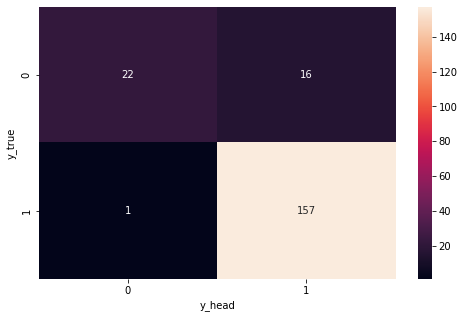

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

### Pengembangan Klasifikasi K-NN

In [ ]:
# perform algoritma KNN untuk Sentimen Positif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5,weights='distance')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(f'confusion matrix:\n {confusion_matrix(y_test, predictions)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predictions, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Vaksin:")
print("Accuracy:" , accuracy_score(y_test,predictions))
print("Precision:" , precision_score(y_test,predictions, average="binary", pos_label="P"))
print("Recall:" , recall_score(y_test,predictions, average="binary", pos_label="P"))
print("f1_score:" , f1_score(y_test,predictions, average="binary", pos_label="P"))
print("error_rate:", 1-accuracy_score(y_test,predictions))

confusion matrix:
 [[ 22  16]
 [  1 157]]

TN: 22
FP: 16
FN: 1
TP: 157
              precision    recall  f1-score   support

           N       0.96      0.58      0.72        38
           P       0.91      0.99      0.95       158

    accuracy                           0.91       196
   macro avg       0.93      0.79      0.83       196
weighted avg       0.92      0.91      0.90       196


Hasil Klasifikasi Sentimen Analisis Vaksin:
Accuracy: 0.9132653061224489
Precision: 0.9075144508670521
Recall: 0.9936708860759493
f1_score: 0.9486404833836859
error_rate: 0.08673469387755106


In [ ]:
# perform algoritma KNN untuk Sentimen Negatif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5,weights='distance')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print(f'confusion matrix:\n {confusion_matrix(y_test, predictions)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predictions, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Vaksin:")
print("Accuracy:" , accuracy_score(y_test,predictions))
print("Precision:" , precision_score(y_test,predictions, average="binary", pos_label="N"))
print("Recall:" , recall_score(y_test,predictions, average="binary", pos_label="N"))
print("f1_score:" , f1_score(y_test,predictions, average="binary", pos_label="N"))
print("error_rate:", 1-accuracy_score(y_test,predictions))

confusion matrix:
 [[ 22  16]
 [  1 157]]

TN: 22
FP: 16
FN: 1
TP: 157
              precision    recall  f1-score   support

           N       0.96      0.58      0.72        38
           P       0.91      0.99      0.95       158

    accuracy                           0.91       196
   macro avg       0.93      0.79      0.83       196
weighted avg       0.92      0.91      0.90       196


Hasil Klasifikasi Sentimen Analisis Vaksin:
Accuracy: 0.9132653061224489
Precision: 0.9565217391304348
Recall: 0.5789473684210527
f1_score: 0.721311475409836
error_rate: 0.08673469387755106


### Pengujian terhadap kebenaran teks

In [ ]:
# Input kalimat teks
kalimat_tes = [" efek vaksin pilek puyeng lemes mens badan gel sakit perut behhh " ]

In [ ]:
# definisikan nama label
nama_label = ["P","N"]

In [ ]:
#Loop untuk prediksi
for teks in kalimat_tes:
    arr_teks = []
    arr_teks.append(teks)
    vektor = vectorizer.transform(arr_teks)
    prediksi_label_knn = classifier.predict(vektor)

In [ ]:
prediksi_label_knn

array(['N'], dtype=object)

### Word Cloud

Word cloud (disebut juga text cloud atau tag cloud) merupakan salah satu metode untuk menampilkan data teks secara visual. Grafik ini populer dalam text mining karena mudah dipahami. Dengan menggunakan word cloud, gambaran frekuensi kata-kata dapat ditampilkan dalam bentuk yang menarik namun tetap informatif. Semakin sering satu kata digunakan, maka semakin besar pula ukuran kata tersebut ditampilkan dalam word cloud.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#Word Cloud Teks Positif
f = open("Teks_Positif.txt", "r")

isi_text_positif = f.read()

In [ ]:
print(isi_text_positif)

rt vaksin impor holding bumn farmasi jamin perintah pfizer dituntutxexxa
tapi kelar sih efek vaksin mager mo ngapa ngapain
vaksin lanjut tahan aktifitas antibody tubuh normal kah txexxa
rt menteri sehat ada panel ahli usul ingat risiko cetak efek samping sexexxa
rt sabtu desember menteri sehat jepang ingat efek samping vaksin adang otot jantung daxexxa
ibuku vaksin tiga efek cuman meriang aja sih syukur ga aneh aneh
efek samping suntik vaksin booster ringan dosis
rt vaksin anggap mutlak aman boro teliti investigasi efek sampingxexxa
 hahaha emg kali vaksin gada efek samping gada tangan sakit jg macem
 kalo efek samping gantung sm imun sm jenis vaksin nya sih yg vaxexxa
 hooh tp gantung kondisi badan jg sih jd kyk gtu tuh beda org efek vaksin lu ngue sxexxa
 vaksin gada efek ngantuk ajaa
efek vaksin ngawang badan ga asa xfxfxx
 ga efek vaksin dosis az
vaksin covid buat pfizer moderna bas mrna efek dorong besar kadar antibodixexxa
 oh kemarin habis vaksin pfizer demam gtu gue engga efek 

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

In [ ]:
wordcloud.generate(isi_text_positif)

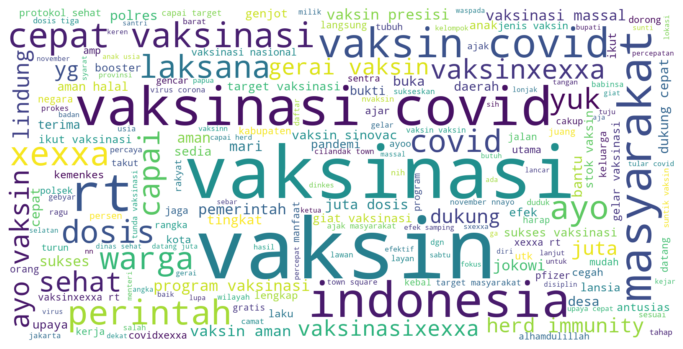

In [ ]:
plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('wordcloud_positif.png')
plt.axis("off")

plt.show()

In [ ]:
#Word Cloud Teks Negatif
f = open("Teks_Negatif.txt", "r")

isi_text_negatif = f.read()

In [ ]:
print(isi_text_negatif)

banyak yg bhw vaksin solusi abai efek tsb tubuh vaksin status eua fdacdc disxexxa
efek vaksin demam kayak npusing
 nemenin vaksin makjixfxfxaxb nemenin aja abis vaksin efek samping nya
lemes ga tenaga demam efek vaksin emg cuacatp pikir sihga yg nanya gw xfxfxaxaxfxfxaxb
rt udah suntik teliti efek thd menstruasi mantap aplg vaksin nya ya pakdok xfxfxxdxfxfxfxbdxfxfxxdxfxfxfxbd
rt efek samping vaksin astra benerxexxd emangxfxfxx badan auto lemes demammenggigil nyeri dada pusing lengkap bgt udah
 efek vaksin bikin bodoh gak sih curiga deh wkwk
 vaksin efek stroke jamaah
 emang vaksin efek samping turun hormon seksual gmn
tidur bawah jam malam xfxfxxadxfxfxaxa efek vaksin si kayak
 kek kiriwok kemaren efek paksa vaksin fuckxfxfxaxxfxfxaxxfxfxaxxfxfxx
rt yg fit ni lepas vaksin kuat menurunibu ayah sakit badan hilangtapixexxa
stress skrg mahnkemarin vaksin trus siang tbtb efek nya kerasanmeriangpusing bangetttt kaki lxexxa
efek vaksin gk enk bgt anjirxfxfxxdahal vaksin aja
efek vaksin laper

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

In [ ]:
wordcloud.generate(isi_text_negatif)

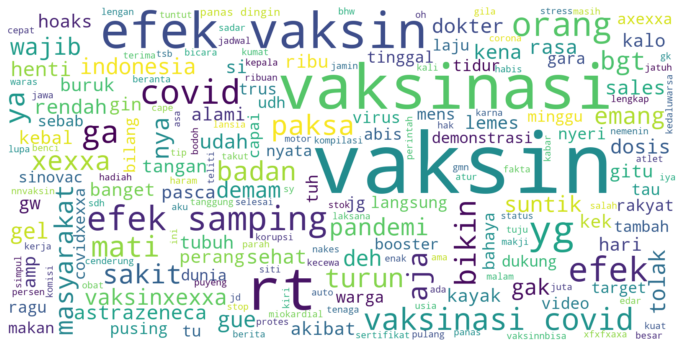

In [ ]:
plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('wordcloud_negatif.png')
plt.axis("off")

plt.show()